#### Probabilistic Models Final Project
#### Modeling and Inferring Airline Passenger Satisfaction

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os
# Plot settings
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 12

In [3]:
#loading the data
data=pd.read_csv("train.csv").drop('Unnamed: 0', axis=1)

In [4]:
print(data.iloc[:,0:27].isna().sum())

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


In [5]:
#Filling in nan values
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(0)

In [6]:
print(data.iloc[:,0:27].isna().sum())

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [7]:
data['Departure Delay in Minutes'] = pd.cut(x=data['Departure Delay in Minutes'], bins=[-1, 10, 30, np.inf],
                     labels=['No delay', 'Acceptable amount of delay', 'Delayed'])

data['Arrival Delay in Minutes'] = pd.cut(x=data['Arrival Delay in Minutes'], bins=[-1, 10, 30, np.inf],
                     labels=['No delay', 'Acceptable amount of delay', 'Delayed'])

In [8]:
data_raw=data.copy()

In [9]:
data['Departure Delay in Minutes']=data['Departure Delay in Minutes'].map(dict({'No delay': 0, 'Acceptable amount of delay':1, 'Delayed':2}))
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].map(dict({'No delay': 0, 'Acceptable amount of delay':1, 'Delayed':2}))

In [10]:
# Convert category to int array
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].astype('int')
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].astype('int')

In [11]:
data['Gender']=data['Gender'].map(dict({'Male': 0, 'Female': 1}))
data['Customer Type']=data['Customer Type'].map(dict({'disloyal Customer': 0, 'Loyal Customer': 1}))
data['Type of Travel']=data['Type of Travel'].map(dict({'Personal Travel': 0, 'Business travel': 1}))
#data['Class']=data['Class'].map(dict({'Eco Plus': 0, 'Business': 1, 'Eco': 2}))
data['satisfaction']=data['satisfaction'].map(dict({'neutral or dissatisfied': 0, 'satisfied': 1}))

In [12]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,1,1,0
1,5047,0,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,0,0,0
2,110028,1,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,24026,1,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,1,0,0
4,119299,0,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,Eco,192,2,1,2,...,2,3,1,4,2,3,2,0,0,0
103900,73097,0,1,49,1,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0,1
103901,68825,0,0,30,1,Business,1995,1,1,1,...,4,3,2,4,5,5,4,0,1,0
103902,54173,1,0,22,1,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0,0


In [13]:
def oheColumn(oheData, columnName):
    oneHotEnc = OneHotEncoder(dtype=int, handle_unknown='ignore')

    oheDataColumn = oneHotEnc.fit_transform(oheData[[columnName]]).toarray()

    oheData[oneHotEnc.categories_[0]] = oheDataColumn

    for catCol in oneHotEnc.categories_[0]:
        oheData.rename(columns = {catCol:columnName+'_'+catCol}, inplace = True)
    
    return oheData

In [14]:
data = oheColumn(data, 'Class').drop('Class', axis=1)

In [15]:
data

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,70172,0,1,13,0,460,3,4,3,1,...,4,4,5,5,1,1,0,0,0,1
1,5047,0,0,25,1,235,3,2,3,3,...,3,1,4,1,0,0,0,1,0,0
2,110028,1,1,26,1,1142,2,2,2,2,...,4,4,4,5,0,0,1,1,0,0
3,24026,1,1,25,1,562,2,5,5,5,...,3,1,4,2,1,0,0,1,0,0
4,119299,0,1,61,1,214,3,3,3,3,...,4,3,3,3,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,192,2,1,2,3,...,4,2,3,2,0,0,0,0,1,0
103900,73097,0,1,49,1,2347,4,4,4,4,...,5,5,5,4,0,0,1,1,0,0
103901,68825,0,0,30,1,1995,1,1,1,3,...,4,5,5,4,0,1,0,1,0,0
103902,54173,1,0,22,1,1000,1,1,1,5,...,1,5,4,1,0,0,0,0,1,0


In [16]:
data=data.drop_duplicates()

<AxesSubplot:>

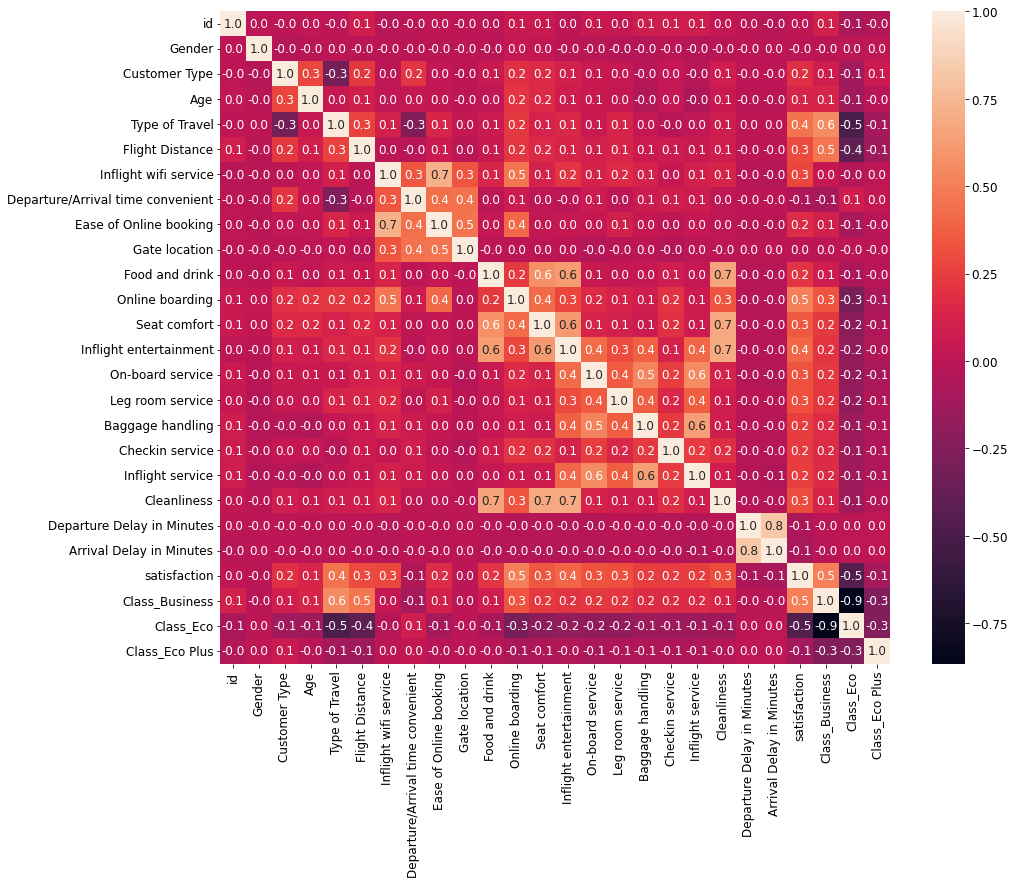

In [54]:
corrMatrix = data.corr()
#print(corrMatrix)
sns.heatmap(corrMatrix, annot=True,fmt=".1f")

In [18]:
data1=data_raw.loc[:, ['Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class','Inflight entertainment','Seat comfort']]#data.drop("id", axis=1) 'Inflight entertainment''Seat comfort'

In [19]:
data1

,Online boarding,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Seat comfort
0,3,4,5,5,Acceptable amount of delay,neutral or dissatisfied,5
1,3,3,4,1,No delay,neutral or dissatisfied,1
2,5,4,4,5,No delay,satisfied,5
3,2,3,4,2,Acceptable amount of delay,neutral or dissatisfied,2
4,5,4,3,3,No delay,satisfied,5
...,...,...,...,...,...,...,...
103899,2,4,3,2,No delay,neutral or dissatisfied,2
103900,4,5,5,4,No delay,satisfied,5
103901,1,4,5,4,No delay,neutral or dissatisfied,5
103902,1,1,4,1,No delay,neutral or dissatisfied,1


In [38]:
np.array(data1.cov())

array([[1.82117442, 0.13271858, 0.1183149 , 0.58709164, 0.74802569],
       [0.13271858, 1.39453287, 0.87265932, 0.14844678, 0.11611459],
       [0.1183149 , 0.87265932, 1.38218357, 0.1369677 , 0.10734313],
       [0.58709164, 0.14844678, 0.1369677 , 1.72206003, 1.17454406],
       [0.74802569, 0.11611459, 0.10734313, 1.17454406, 1.73999188]])

In [43]:
np.array(data1.mean(axis=0)).shape

(5,)

In [20]:
from pgmpy.estimators import PC
from pgmpy.estimators.CITests import chi_square
est = PC(data1)
# print(est.estimate(significance_level=0.01).edges())

In [21]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
hc = HillClimbSearch(data1)
best_model = hc.estimate(scoring_method=BicScore(data1))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Online boarding', 'satisfaction'), ('Baggage handling', 'Inflight service'), ('Cleanliness', 'Seat comfort'), ('Cleanliness', 'Online boarding'), ('Cleanliness', 'satisfaction'), ('Cleanliness', 'Baggage handling'), ('satisfaction', 'Baggage handling'), ('satisfaction', 'Inflight service'), ('satisfaction', 'Departure Delay in Minutes'), ('Seat comfort', 'Online boarding'), ('Seat comfort', 'satisfaction'), ('Seat comfort', 'Baggage handling')]


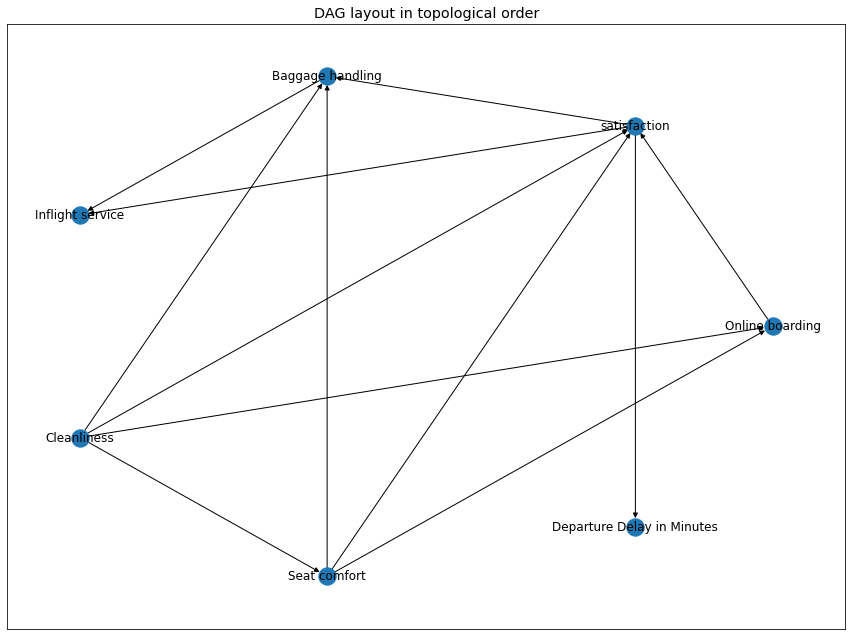

In [22]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(best_model.edges())

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(G, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

In [25]:
best_model

the features which we are inferring are\

1)Satisfaction\
2)Type of Travel

In [23]:
#Maximum likelihood estimator

In [24]:
from pgmpy.models import BayesianModel

model = BayesianModel(best_model.edges())

In [25]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, data1)
# print(mle.estimate_cpd('satisfaction'))  # unconditional
mle_df=mle.estimate_cpd('satisfaction')

In [123]:
print(mle_df)

+---------------------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+-------

In [27]:
from pgmpy.factors.discrete.CPD import TabularCPD

def print_full(cpd):
    backup = TabularCPD._truncate_strtable
    TabularCPD._truncate_strtable = lambda self, x: x
    print(cpd)
    TabularCPD._truncate_strtable = backup

In [29]:
mle.get_parameters()

[<TabularCPD representing P(Type of Travel:2 | Baggage handling:5, Inflight entertainment:6, Inflight wifi service:6, satisfaction:2) at 0x261190311c0>,
 <TabularCPD representing P(Class:3 | Ease of Online booking:6, Inflight wifi service:6, Type of Travel:2, satisfaction:2) at 0x26119147e50>,
 <TabularCPD representing P(Ease of Online booking:6 | Inflight wifi service:6, Online boarding:6, Type of Travel:2, satisfaction:2) at 0x26119015280>,
 <TabularCPD representing P(Departure Delay in Minutes:3 | Type of Travel:2, satisfaction:2) at 0x26119015fa0>,
 <TabularCPD representing P(Arrival Delay in Minutes:3 | Departure Delay in Minutes:3, Type of Travel:2, satisfaction:2) at 0x2611925ba00>,
 <TabularCPD representing P(Inflight wifi service:6 | Baggage handling:5, Inflight entertainment:6, Online boarding:6) at 0x26119261f10>,
 <TabularCPD representing P(satisfaction:2 | Inflight entertainment:6, Inflight wifi service:6, Online boarding:6) at 0x2611925bee0>,
 <TabularCPD representing P(F

In [51]:
print(mle.estimate_cpd('Class'))

In [31]:
# best_model.edges()

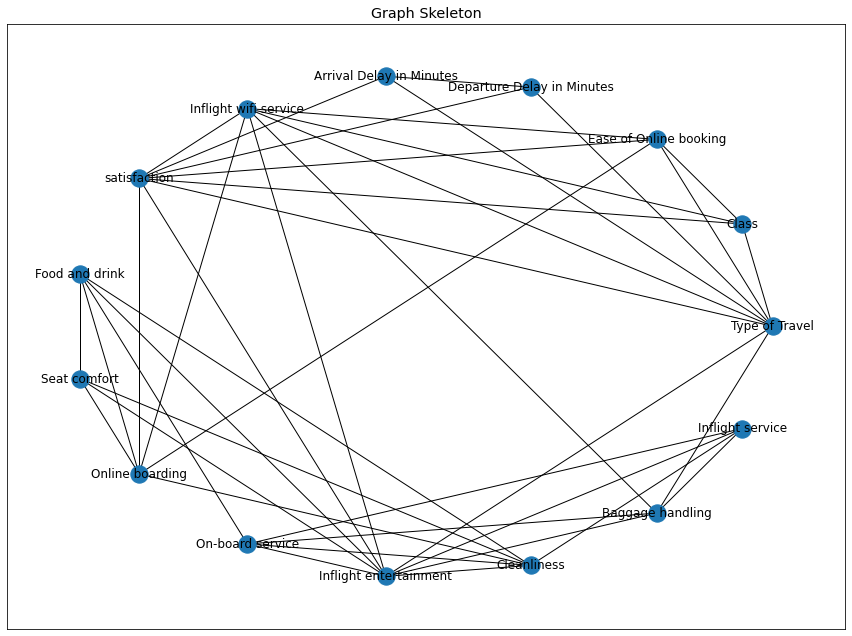

In [32]:
import networkx as nx

DG = G.copy()

# Create the graph skeleton (undirected graph)
UG = DG.to_undirected()
# print("\nGraph Skeleton:")
# print(UG.edges)

# for layer, nodes in enumerate(nx.topological_generations(UG)):
#     # `multipartite_layout` expects the layer as a node attribute, so add the
#     # numeric layer value as a node attribute
#     for node in nodes:
#         UG.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(UG, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(UG, pos=pos, ax=ax)
ax.set_title("Graph Skeleton")
fig.tight_layout()
plt.show()

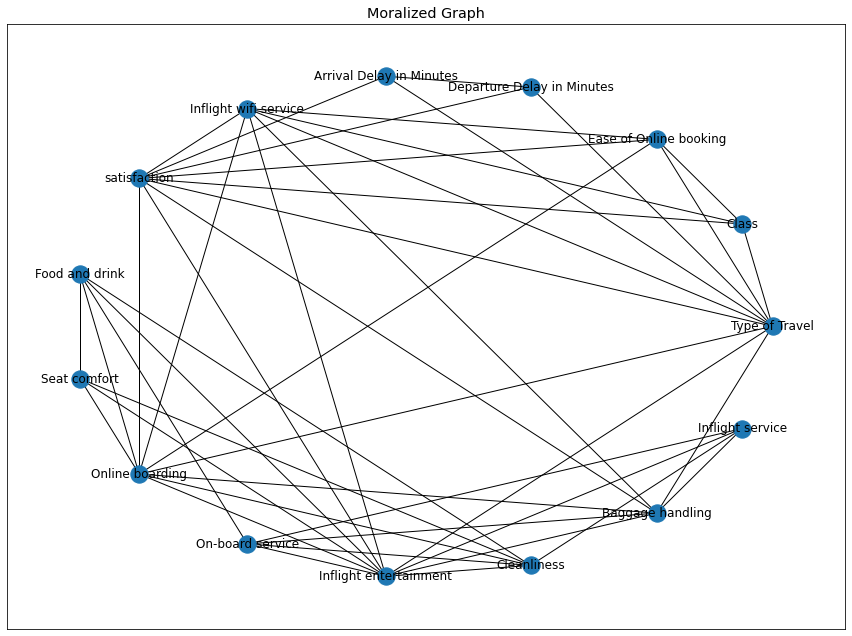

In [33]:
# Moralize the graph
for node in DG.nodes:
    parents = [pred for pred in DG.predecessors(node)]
    for i, parent1 in enumerate(parents):
        for parent2 in parents[i + 1:]:
            if not UG.has_edge(parent1, parent2):
                UG.add_edge(parent1, parent2)
# print("\nMoralized Graph:")
# print(UG.edges)
# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(UG, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(UG, pos=pos, ax=ax)
ax.set_title("Moralized Graph")
fig.tight_layout()
plt.show()

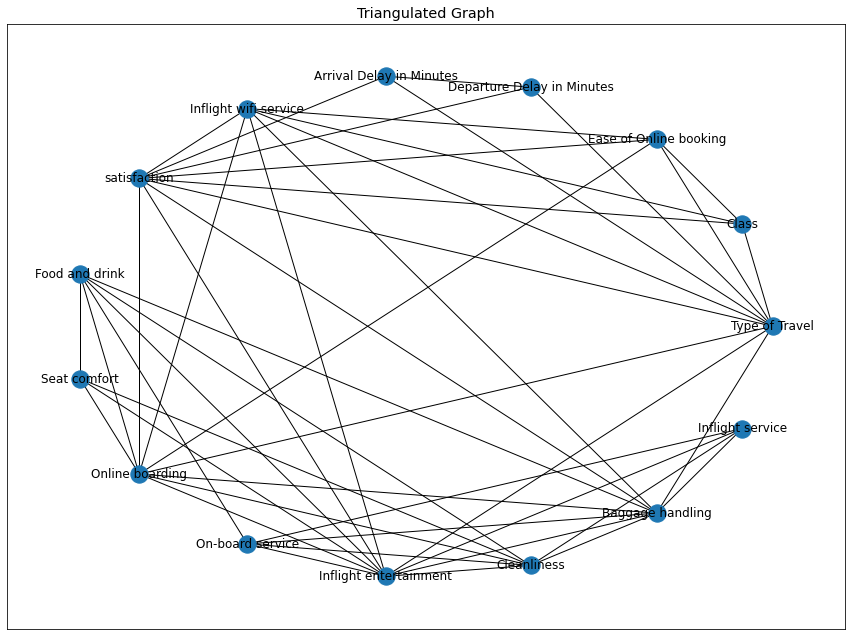

In [34]:
# Triangulate the graph
def find_chordal_graph(graph):
    triangulated_graph = graph.copy()
#     cliques = nx.chordal_graph_cliques(triangulated_graph)
    fill_in_edges = nx.complete_to_chordal_graph(triangulated_graph)

    for u, v in fill_in_edges[0].edges():
        triangulated_graph.add_edge(u, v)

    return triangulated_graph

T_UG = find_chordal_graph(UG)
# print("\nTriangulated Graph:")
# print(triangulated_UG.edges)
# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(T_UG, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(T_UG, pos=pos, ax=ax)
ax.set_title("Triangulated Graph")
fig.tight_layout()
plt.show()

### Joint distribution

In [37]:
data1.columns

Index(['Type of Travel', 'Inflight wifi service', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class', 'Inflight entertainment', 'Seat comfort'],
      dtype='object')

In [38]:
probs = data1.value_counts(['Type of Travel', 'Inflight wifi service', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class', 'Inflight entertainment', 'Seat comfort'], normalize=True)

In [39]:
pd.DataFrame(probs)

0
Type of Travel  Inflight wifi service Ease of Online booking Food and drink Online boarding On-board service Baggage handling Inflight service Cleanliness Departure Delay in Minutes Arrival Delay in Minutes satisfaction            Class    Inflight entertainment Seat comfort          
Business travel 4                     4                      4              4               4                4                4                4           No delay                   No delay                 satisfied               Business 4                      4             0.000452
                3                     3                      4              4               4                4                4                4           No delay                   No delay                 satisfied               Business 4                      4             0.000443
                                                             5              5               5                5                5                5           No delay                   No delay                 satisfied               Business 5                      5             0.000414
Personal Travel 3                     3                      2              3               5                5                4                2           No delay                   No delay                 neutral or dissatisfied Eco      2                      2             0.000375
                                                             4              3               3                4                4                4           No delay                   No delay                 neutral or dissatisfied Eco      4                      4             0.000366
...                                                                                                                                                                                                                                                                                       ...
Business travel 3                     3                      4              3               4                3                3                4           No delay                   No delay                 neutral or dissatisfied Business 4                      2             0.000010
                                                                                                                                                                                                                                       Eco      4                      1             0.000010
                                                                                                                                                                                                                                                                       2             0.000010
                                                                                                                                                                                                                                       Eco Plus 4                      4             0.000010
Personal Travel 5                     5                      5              5               5                5                5                5           Acceptable amount of delay No delay                 satisfied               Eco      5                      5             0.000010

[63712 rows x 1 columns]

**Finding Prior Distribution**

In [41]:
# Prior distribution
prior = data1.value_counts(['satisfaction'], normalize=True)

In [42]:
prior

satisfaction           
neutral or dissatisfied    0.566667
satisfied                  0.433333
dtype: float64

**Finding likelihood Distribution**

In [43]:
data_satisfied=data1.query("satisfaction == 'satisfied'")

In [44]:
data_satisfied

,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,On-board service,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class,Inflight entertainment,Seat comfort
2,Business travel,2,2,5,5,4,4,4,5,No delay,No delay,satisfied,Business,5,5
4,Business travel,3,3,4,5,3,4,3,3,No delay,No delay,satisfied,Business,3,5
7,Business travel,4,4,5,5,5,5,5,4,No delay,No delay,satisfied,Business,5,5
13,Personal Travel,4,4,4,4,4,2,2,4,No delay,No delay,satisfied,Eco,4,4
16,Business travel,3,3,4,4,5,4,4,4,Delayed,Delayed,satisfied,Business,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103890,Business travel,3,5,2,5,3,3,3,3,No delay,No delay,satisfied,Eco Plus,3,4
103891,Business travel,5,5,2,5,4,4,4,4,Delayed,Delayed,satisfied,Business,4,5
103894,Business travel,4,4,5,5,3,4,4,5,Acceptable amount of delay,Acceptable amount of delay,satisfied,Business,5,5
103897,Business travel,5,5,5,5,4,4,4,4,No delay,No delay,satisfied,Business,4,4


In [122]:
Likelihood_Prob_satisfied=round(data_satisfied.pivot_table(index=['Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       #'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class','Inflight entertainment','Seat comfort'],values="satisfaction"
                                                           ,  aggfunc=["count"]),2).fillna(0).stack()
Likelihood_Prob_satisfied=Likelihood_Prob_satisfied.div(Likelihood_Prob_satisfied.loc[:,'count'].values.sum())
for i in Likelihood_Prob_satisfied.index:
    print(Likelihood_Prob_satisfied.loc[i],Likelihood_Prob_unsatisfied.loc[i])
    
#.rename(columns ={"count" :"Death" })
# .div(len(data_satisfied))

KeyError: ('Business travel', 0, 0, 0, 1, 2, 4, 4, 3, 'Eco Plus', 5, 3, 'satisfaction')

'Departure Delay in Minutes' and 'Arrival Delay in Minutes' were dropped as they increased size of the dataframe and so our systems did not have enough computaional power to compute the likelihood porbabilities.

In [104]:
data_unsatisfied=data1.query("satisfaction == 'neutral or dissatisfied'")

In [105]:
data_unsatisfied

,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,On-board service,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class,Inflight entertainment,Seat comfort
0,Personal Travel,3,3,5,3,4,4,5,5,Acceptable amount of delay,Acceptable amount of delay,neutral or dissatisfied,Eco Plus,5,5
1,Business travel,3,3,1,3,1,3,4,1,No delay,No delay,neutral or dissatisfied,Business,1,1
3,Business travel,2,5,2,2,2,3,4,2,Acceptable amount of delay,No delay,neutral or dissatisfied,Business,2,2
5,Personal Travel,3,2,1,2,3,4,4,1,No delay,No delay,neutral or dissatisfied,Eco,1,1
6,Personal Travel,2,2,2,2,3,4,5,2,No delay,Acceptable amount of delay,neutral or dissatisfied,Eco,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,Personal Travel,3,3,2,3,4,4,4,2,No delay,No delay,neutral or dissatisfied,Eco,2,2
103899,Business travel,2,2,2,2,3,4,3,2,No delay,No delay,neutral or dissatisfied,Eco,2,2
103901,Business travel,1,1,4,1,3,4,5,4,No delay,Acceptable amount of delay,neutral or dissatisfied,Business,4,5
103902,Business travel,1,1,1,1,4,1,4,1,No delay,No delay,neutral or dissatisfied,Eco,1,1


In [106]:
Likelihood_Prob_unsatisfied=round(data_unsatisfied.pivot_table(index=['Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       #'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class','Inflight entertainment','Seat comfort'],values="satisfaction"
                                                           ,  aggfunc=["count"]),2).fillna(0).stack()
Likelihood_Prob_unsatisfied=Likelihood_Prob_unsatisfied.div(Likelihood_Prob_unsatisfied.loc[:,'count'].values.sum())
Likelihood_Prob_unsatisfied
#.rename(columns ={"count" :"Death" })
# .div(len(data_satisfied))

count
Type of Travel  Inflight wifi service Ease of Online booking Food and drink Online boarding On-board service Baggage handling Inflight service Cleanliness Class    Inflight entertainment Seat comfort                       
Business travel 0                     1                      0              1               1                4                3                0           Eco Plus 0                      2            satisfaction  0.000017
                                                                                            2                3                3                0           Eco      0                      2            satisfaction  0.000017
                                                                                            4                3                4                0           Eco Plus 0                      2            satisfaction  0.000017
                                      3                      0              1               4                4                3                0           Eco      0                      3            satisfaction  0.000017
                                      4                      0              1               3                4                3                0           Eco Plus 0                      4            satisfaction  0.000017
...                                                                                                                                                                                                                        ...
Personal Travel 4                     5                      5              5               4                5                4                5           Eco      5                      5            satisfaction  0.000017
                                                                                                                                                           Eco Plus 5                      5            satisfaction  0.000017
                                                                                            5                5                2                5           Eco      5                      5            satisfaction  0.000017
                                                                                                                              5                3           Business 5                      4            satisfaction  0.000017
                                                                                                                                               5           Eco      5                      4            satisfaction  0.000017

[28762 rows x 1 columns]

In [111]:
#Likelihood_Prob_satisfied.query("'count'==Likelihood_Prob_satisfied.max()")
maxLikelihoodValue = Likelihood_Prob_satisfied.max()
maxLikelihoodSequence=dict(zip(('Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       #'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class','Inflight entertainment','Seat comfort'),
         Likelihood_Prob_satisfied[Likelihood_Prob_satisfied==maxLikelihoodValue].index[0]))
#maxLikelihoodSequence=dict(('Type of Travel', 'Inflight wifi service',
#       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
#       'Baggage handling', 'Inflight service', 'Cleanliness',
#       #'Departure Delay in Minutes', 'Arrival Delay in Minutes',
#       'Class','Inflight entertainment','Seat comfort')=Likelihood_Prob_satisfied[Likelihood_Prob_satisfied==Likelihood_Prob_satisfied.max()].index[0])

#Likelihood_Prob_satisfied[Likelihood_Prob_satisfied['count']==Likelihood_Prob_satisfied.max()].index

The maximum likelihood probability is {{maxLikelihoodValue}} <br>with the sequence {{maxLikelihoodSequence}}

In [112]:
maxLikelihoodValue1 = Likelihood_Prob_unsatisfied.max()
maxLikelihoodSequence1=dict(zip(('Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       #'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class','Inflight entertainment','Seat comfort'),
         Likelihood_Prob_unsatisfied[Likelihood_Prob_unsatisfied==maxLikelihoodValue].index[0]))

The maximum likelihood probability is {{maxLikelihoodValue1}} <br>with the sequence {{maxLikelihoodSequence1}}

In [54]:
data1

,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,On-board service,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class,Inflight entertainment,Seat comfort
0,Personal Travel,3,3,5,3,4,4,5,5,Acceptable amount of delay,Acceptable amount of delay,neutral or dissatisfied,Eco Plus,5,5
1,Business travel,3,3,1,3,1,3,4,1,No delay,No delay,neutral or dissatisfied,Business,1,1
2,Business travel,2,2,5,5,4,4,4,5,No delay,No delay,satisfied,Business,5,5
3,Business travel,2,5,2,2,2,3,4,2,Acceptable amount of delay,No delay,neutral or dissatisfied,Business,2,2
4,Business travel,3,3,4,5,3,4,3,3,No delay,No delay,satisfied,Business,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Business travel,2,2,2,2,3,4,3,2,No delay,No delay,neutral or dissatisfied,Eco,2,2
103900,Business travel,4,4,2,4,5,5,5,4,No delay,No delay,satisfied,Business,5,5
103901,Business travel,1,1,4,1,3,4,5,4,No delay,Acceptable amount of delay,neutral or dissatisfied,Business,4,5
103902,Business travel,1,1,1,1,4,1,4,1,No delay,No delay,neutral or dissatisfied,Eco,1,1


In [ ]:
# This function helps to calculate probability distribution, which goes into BBN (note, can handle up to 2 parents)
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob

In [151]:
data

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,70172,0,1,13,0,460,3,4,3,1,...,4,4,5,5,1,1,0,0,0,1
1,5047,0,0,25,1,235,3,2,3,3,...,3,1,4,1,0,0,0,1,0,0
2,110028,1,1,26,1,1142,2,2,2,2,...,4,4,4,5,0,0,1,1,0,0
3,24026,1,1,25,1,562,2,5,5,5,...,3,1,4,2,1,0,0,1,0,0
4,119299,0,1,61,1,214,3,3,3,3,...,4,3,3,3,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,192,2,1,2,3,...,4,2,3,2,0,0,0,0,1,0
103900,73097,0,1,49,1,2347,4,4,4,4,...,5,5,5,4,0,0,1,1,0,0
103901,68825,0,0,30,1,1995,1,1,1,3,...,4,5,5,4,0,1,0,1,0,0
103902,54173,1,0,22,1,1000,1,1,1,5,...,1,5,4,1,0,0,0,0,1,0


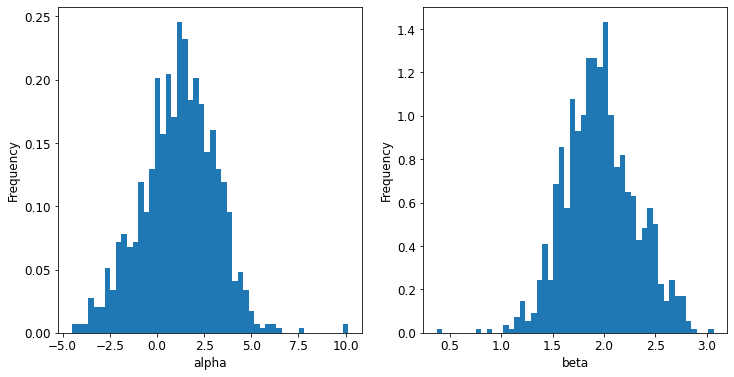

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


# Define the prior hyperparameters for alpha and beta
alpha_mu_prior = 0
alpha_sigma_prior = 10
beta_mu_prior = 0
beta_sigma_prior = 10

# Number of Gibbs sampling iterations
n_iterations = 1000

# Initialize the parameters (alpha and beta)
alpha = 0
beta = 0

# Store the samples
alpha_samples = np.zeros(n_iterations)
beta_samples = np.zeros(n_iterations)

# Perform Gibbs sampling
for i in range(n_iterations):
    # Sample alpha given beta
    alpha_sigma_posterior = np.sqrt(1 / (N / alpha_sigma_prior ** 2 + 1 / beta_sigma_prior ** 2))
    alpha_mu_posterior = alpha_sigma_posterior ** 2 * (np.sum(y - beta * x) / alpha_sigma_prior ** 2)
    alpha = np.random.normal(alpha_mu_posterior, alpha_sigma_posterior)

    # Sample beta given alpha
    beta_sigma_posterior = np.sqrt(1 / (np.sum(x ** 2) / beta_sigma_prior ** 2 + 1 / alpha_sigma_prior ** 2))
    beta_mu_posterior = beta_sigma_posterior ** 2 * (np.sum(x * (y - alpha)) / beta_sigma_prior ** 2)
    beta = np.random.normal(beta_mu_posterior, beta_sigma_posterior)

    # Store the samples
    alpha_samples[i] = alpha
    beta_samples[i] = beta


# Plot the samples
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(alpha_samples, bins=50, density=True)
plt.xlabel('alpha')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(beta_samples, bins=50, density=True)
plt.xlabel('beta')
plt.ylabel('Frequency')
plt.show()

In [158]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal


# Define the probabilistic model
def log_posterior(theta, x):
    mu1, mu2, sigma1, sigma2, pi = theta
    log_likelihood = np.sum(np.log(pi * multivariate_normal.pdf(x, mu1, sigma1) + (1 - pi) * multivariate_normal.pdf(x, mu2, sigma2)))
    return log_likelihood

# Define the Gibbs sampler
def gibbs_sampling(num_samples, data):
    num_vars = 5  # mu1, mu2, sigma1, sigma2, pi
    samples = np.zeros((num_samples, num_vars))
    
    # Initialize the variables
    mu1, mu2 = data[np.random.choice(data,data.shape[0], 2)]
    sigma1 = sigma2 = np.cov(data.T)
    pi = 0.5

    for i in range(num_samples):
        # Sample from the full conditional distributions
        # Here we use Metropolis-Hastings algorithm as an example
        for _ in range(50):  # Metropolis-Hastings iterations
            proposal = [np.random.multivariate_normal(mu1, 0.1 * sigma1),
                        np.random.multivariate_normal(mu2, 0.1 * sigma2),
                        sigma1 + np.random.normal(0, 0.1 * sigma1),
                        sigma2 + np.random.normal(0, 0.1 * sigma2),
                        np.random.beta(pi, 1)]
            log_p_current = log_posterior([mu1, mu2, sigma1, sigma2, pi], data)
            log_p_proposal = log_posterior(proposal, data)
            acceptance_ratio = np.exp(log_p_proposal - log_p_current)
            if np.random.rand() < acceptance_ratio:
                mu1, mu2, sigma1, sigma2, pi = proposal

        # Save the new state as a sample
        samples[i] = [mu1, mu2, sigma1, sigma2, pi]

    return samples

# Run the Gibbs sampler
num_samples = 1000
samples = gibbs_sampling(num_samples, data)

# Convert the samples back to a DataFrame
sample_df = pd.DataFrame(samples, columns=['mu1', 'mu2', 'sigma1', 'sigma2', 'pi'])

ValueError: a must be 1-dimensional

In [159]:
# Spliting the dataset into train and test
from sklearn.model_selection import train_test_split
#we want to split the data in 80:20 for train:test dataset

X = data.drop(columns = ['satisfaction']).copy()
y = data['satisfaction']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=42)

In [163]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=2, random_state=42).fit(X_train,y_train)
# bgm.means_
bgm.predict(X_test)


array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [164]:
y_test

80638    0
43398    0
32751    0
33571    0
71287    0
        ..
8158     0
53718    0
33319    0
99162    1
96811    1
Name: satisfaction, Length: 20781, dtype: int64

In [162]:
bgm.score(X_test)


-36.62649582285198

In [ ]:
# This function helps to calculate probability distribution, which goes into BBN (note, can handle up to 2 parents)
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob

## CPDs and Sampling

In [46]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

# generate data
model = BayesianModel(best_model)
model.fit(data1, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5
for cpd in model.get_cpds():
    print(cpd)

+--------------------+---------------------+---------------------+----------------------+----------------------+----------------------+---------------------+---------------------+----------------------+----------------------+----------------------+----------------------+----------------------+---------------------+---------------------+----------------------+----------------------+----------------------+----------------------+---------------------+---------------------+----------------------+---------------------+----------------------+----------------------+---------------------+----------------------+----------------------+----------------------+----------------------+----------------------+---------------------+----------------------+---------------------+---------------------+----------------------+----------------------+
| Cleanliness        | Cleanliness(0)      | Cleanliness(0)      | Cleanliness(0)       | Cleanliness(0)       | Cleanliness(0)       | Cleanliness(0)      | Clea

In [47]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork

In [49]:
from pgmpy.sampling import GibbsSampling
gibbs_chain = GibbsSampling(model)
gibbs_chain.sample(size=10)

  0%|          | 0/9 [00:00<?, ?it/s]

,Online boarding,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Seat comfort
0,2,0,3,0,2,1,4
1,1,2,3,4,2,0,4
2,4,1,2,4,2,0,4
3,2,3,4,4,1,0,4
4,3,2,1,4,2,0,4
5,4,0,1,4,2,1,4
6,4,4,5,5,0,1,2
7,5,4,5,4,0,1,4
8,0,4,5,5,2,0,5
9,4,4,4,5,2,1,4
